In [24]:
## Librerías para análisis y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [25]:
## Cargamos el archivo
df = pd.read_csv('/content/fraud.csv')
df.shape

(15420, 33)

In [26]:
# columns = ['AccidentArea', 'Sex', 'Age', 'VehicleCategory', 'VehiclePrice','Make', 'FraudFound_P']
df['FraudFound_P'].head(10)

,FraudFound_P
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [27]:
df.isnull().sum()

,0
Month,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,0
MonthClaimed,0
WeekOfMonthClaimed,0
Sex,0
MaritalStatus,0


FraudFound_P
0    14497
1      923
Name: count, dtype: int64


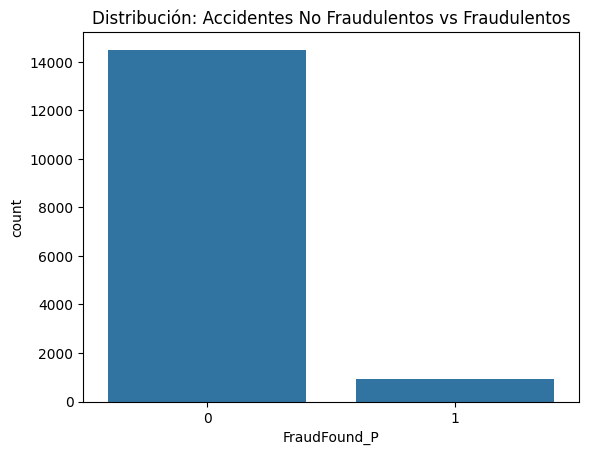

In [28]:
## Verificar la columna de fraude
## FraudFound_P = 0 -> No fraudulento
## FraudFound_P = 1 -> Fraudulento
print(df['FraudFound_P'].value_counts())
sns.countplot(x='FraudFound_P', data=df)
plt.title("Distribución: Accidentes No Fraudulentos vs Fraudulentos")
plt.show()

In [35]:
## Dejamos solo las columnas numéricas para escalarlas ##
newDf = df[['FraudFound_P']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(newDf)

In [36]:
## Entrenamos el modelo
model = IsolationForest(n_estimators=100, contamination=0.0018, random_state=42)
df['newMarcacion'] = model.fit_predict(scaled_features)

In [38]:
## Vemos matriz de conteo
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(df['FraudFound_P'], df['newMarcacion'] == -1)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Real Accidente', 'Real No Accidente'], columns=['Detectado Accidente', 'Detectado No accidente'])
conf_matrix_df

,Detectado Accidente,Detectado No accidente
Real Accidente,14497,0
Real No Accidente,923,0
